In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import os
plt.style.use('dark_background')
plt.style.use('seaborn-dark')

In [2]:
files_directory = 'input/'
installments = pd.read_csv(files_directory + 'installments_payments.csv')

In [3]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [4]:
application_test = pd.read_csv(files_directory + 'application_test.csv')
application_train = pd.read_csv(files_directory + 'application_train.csv')

In [5]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [10]:
set(application_train.columns) - set(application_test.columns)

{'TARGET'}

In [11]:
application_train['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

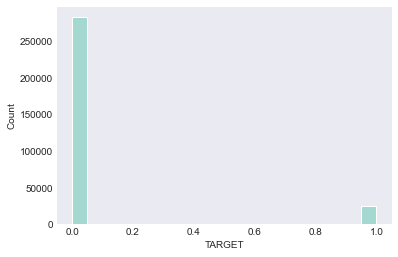

In [12]:
sns.histplot(data=application_train, x="TARGET")

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

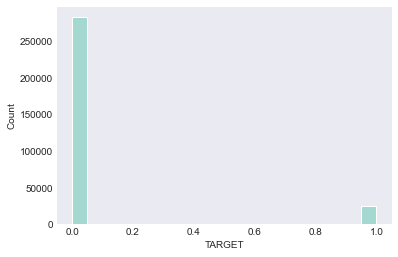

In [14]:
sns.histplot(data=application_train, x="TARGET")
plt.title('')
plt.show()

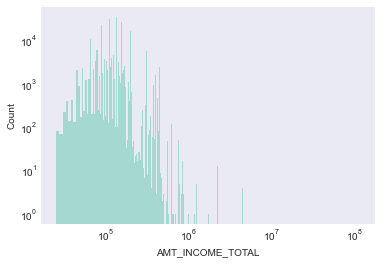

In [15]:
g = sns.histplot(data=application_train, x="AMT_INCOME_TOTAL")
g.set_yscale("log")
g.set_xscale("log")
plt.title('')
plt.show()

In [16]:
application_train['AMT_INCOME_TOTAL'].quantile(.1)

81000.0

In [17]:
application_train['AMT_INCOME_TOTAL'].quantile(.2)

99000.0

In [18]:
application_train['AMT_INCOME_TOTAL'].quantile([.1, .2, .3])


0.1     81000.0
0.2     99000.0
0.3    112500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [19]:
application_train['AMT_INCOME_TOTAL'].quantile(np.arange(0, 1.1, .1))

0.0        25650.0
0.1        81000.0
0.2        99000.0
0.3       112500.0
0.4       135000.0
0.5       147150.0
0.6       162000.0
0.7       180000.0
0.8       225000.0
0.9       270000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [20]:
application_train['AMT_INCOME_TOTAL'].apply(lambda x: 20000 <= x < 40000).sum()

963

In [21]:
lower_bound_income = np.arange(0, 300, 20)
upper_bound_income = [u + 20 for u in lower_bound_income]
upper_bound_income[-1] = np.inf

In [22]:
range_name = []
effectifs = []

for low, up in zip(lower_bound_income, upper_bound_income):
    range_name.append(str(low) + 'k' + '-' + str(up) + 'k')
    effectifs.append(application_train['AMT_INCOME_TOTAL'].apply(lambda x: 1000*low <= x < 1000*up).sum())

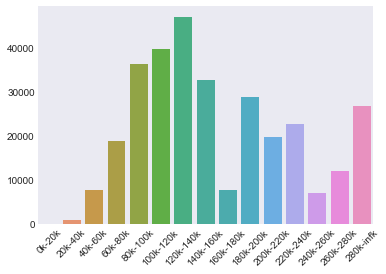

In [23]:
sns.barplot(x=range_name, y=effectifs)
plt.xticks(rotation=45)
plt.show()

In [24]:
set(application_train['NAME_CONTRACT_TYPE'])

{'Cash loans', 'Revolving loans'}

In [25]:
set(application_train['CODE_GENDER'])

{'F', 'M', 'XNA'}

In [26]:
width_income_group = 20000
width_income_group_k = int(width_income_group // 1000)
max_income_group = 20
application_train['income_group'] = application_train['AMT_INCOME_TOTAL'].astype(int) // width_income_group
application_train['income_group'] = application_train['income_group'].apply(lambda x: min(x, max_income_group))

In [27]:
fails = pd.DataFrame(application_train[application_train['TARGET'] == 1]['income_group'].value_counts().sort_index().rename('nb_loans'))
fails['status'] = 'fail'
success = pd.DataFrame(application_train[application_train['TARGET'] == 0]['income_group'].value_counts().sort_index().rename('nb_loans'))
success['status'] = 'success'
to_plot = pd.concat([fails, success])

In [28]:
labels = [str(width_income_group_k * x) + 'k-' + str(width_income_group_k * (x+1)) + 'k' for x in to_plot.index]
max_income = labels[-1]
labels = [((labels[-1].split('-')[0] + '+') if l == max_income else l)for l in labels]
to_plot.index = labels
to_plot = to_plot.reset_index().rename(columns={'index': 'income_group'})

In [29]:
to_plot

,income_group,nb_loans,status
0,20k-40k,80,fail
1,40k-60k,558,fail
2,60k-80k,1531,fail
3,80k-100k,3056,fail
4,100k-120k,3461,fail
5,120k-140k,3991,fail
6,140k-160k,2860,fail
7,160k-180k,635,fail
8,180k-200k,2379,fail
9,200k-220k,1601,fail


In [30]:
fig = go.Figure()
for status, group in to_plot.groupby("status"):
    fig.add_trace(go.Bar(x=group["income_group"], y=group["nb_loans"], name=status,
      hovertemplate="status=%s<br>income_group=%%{x}<br>nb_loans=%%{y}<extra></extra>"% status))
fig.update_layout(legend_title_text = "Status")
fig.update_xaxes(title_text="income_group")
fig.update_yaxes(title_text="nb_loans")
fig.update_layout(barmode='stack')
fig.show()

In [31]:
max_children = 3
application_train['children_group'] = application_train['CNT_CHILDREN']\
    .apply(lambda x: str(x) if x < max_children else str(max_children) + '+')

In [32]:
application_train['children_group'].value_counts().sort_index()

0     215371
1      61119
2      26749
3+      4272
Name: children_group, dtype: int64

In [33]:
children_filter = '3+'
def get_data_filtered_by_child_group(group=None):
    if not group:
        return application_train
    return application_train[application_train['children_group'] == group]


In [34]:
df = get_data_filtered_by_child_group(children_filter)

In [35]:
to_plot

,income_group,nb_loans,status
0,20k-40k,80,fail
1,40k-60k,558,fail
2,60k-80k,1531,fail
3,80k-100k,3056,fail
4,100k-120k,3461,fail
5,120k-140k,3991,fail
6,140k-160k,2860,fail
7,160k-180k,635,fail
8,180k-200k,2379,fail
9,200k-220k,1601,fail


## Ok we're done browsing let's use kaggle kernel

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import warnings
import pickle
import time

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, fbeta_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from kaggle_kernel import preprocess_data, timer

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [37]:
temp_directory = 'fast_forward/'

def fast_forward_retrieve(filename):
    print('RETRIEVING', filename)
    return pickle.load(open(temp_directory + filename, 'rb'))

def file_exists(filename):
    exists = os.path.exists(temp_directory + filename)
    print(filename, 'found' if exists else "not found")
    return exists

def fast_forward_save(obj, filename):
    print('SAVING', filename)
    pickle.dump(obj, open(temp_directory + filename, 'wb'))

In [38]:
filename = 'df_from_kernel'

if file_exists(filename):
    df = fast_forward_retrieve(filename)
else:
    with timer('fetching data'):
        df = preprocess_data()
    fast_forward_save(df, filename)

df_from_kernel found
RETRIEVING df_from_kernel


In [39]:
# df = df.set_index('SK_ID_CURR')[columns]

In [40]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int)

In [41]:
str_len = max([len(c) for c in df.columns])
for c in df.columns:
    null_percentage_this_col = 100 * df[c].isnull().sum() // len(df[c])
    if null_percentage_this_col:
        print(c.rjust(str_len), null_percentage_this_col, '% null')

df['percentage_columns_null'] = (100 * df.isnull().sum(axis=1) / df.shape[1]).astype(int)
df['TARGET'] = df['TARGET'].replace(np.NaN, 'nan')

df_w_target = df[df['TARGET'] != 'nan']
df_w_target.loc[:, 'TARGET'] = df_w_target.loc[:, 'TARGET'].astype(int)

In [42]:
X = df_w_target.loc[:, df_w_target.isnull().sum(axis=0) == 0].drop(columns=['TARGET', 'percentage_columns_null'])
y = df_w_target.loc[:, 'TARGET'].astype(int)
print('df w target shape')
print(X.shape, y.shape)

df w target shape
(356251, 825) (356251,)


In [62]:
if file_exists('X_sm') and file_exists('y_sm'):
    X_sm, y_sm = fast_forward_retrieve('X_sm'), fast_forward_retrieve('y_sm')
    X_sm = X_sm.drop(columns=['index'], errors='ignore').sort_values(by='SK_ID_CURR').set_index('SK_ID_CURR', drop=True)
    fast_forward_save(X_sm, 'X_sm')
else:
    with timer('expanding dataset with SMOTE'):
        sm = SMOTE(random_state=0)
        X_sm, y_sm = sm.fit_resample(X, y)
        fast_forward_save(X_sm, 'X_sm')
        fast_forward_save(y_sm, 'y_sm')
print('shape after smote')
print(X_sm.shape, y_sm.shape)

X_sm not found
SAVING X_sm
SAVING y_sm
expanding dataset with SMOTE - done in 927s

shape after smote
(662852, 825) (662852,)


In [94]:
nb_smote_customers = X_sm.shape[0] - X.shape[0]
X_sm.iloc[X.shape[0]:, :]['SK_ID_CURR'] = list(range(9000000, 9000000 + nb_smote_customers))

In [95]:
len(set(X_sm['SK_ID_CURR'])), len(X_sm)

(662852, 662852)

In [97]:
X_sm = X_sm.drop(columns=['index'], errors='ignore').set_index('SK_ID_CURR', drop=True)

In [98]:
X_sm

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_Signed_MISSING,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_NAME_CONTRACT_STATUS_nan_MISSING,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0,0,0,0,202500.000000,4.065975e+05,24700.500000,3.510000e+05,0.018801,-9461,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.000000
100003,1,0,1,0,270000.000000,1.293502e+06,35698.500000,1.129500e+06,0.003541,-16765,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.000000
100004,0,1,0,0,67500.000000,1.350000e+05,6750.000000,1.350000e+05,0.010032,-19046,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.000000
100006,1,0,0,0,135000.000000,3.126825e+05,29686.500000,2.970000e+05,0.008019,-19005,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,6.000000
100007,0,0,0,0,121500.000000,5.130000e+05,21865.500000,5.130000e+05,0.028663,-19932,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306596,0,0,0,1,201050.745038,8.537475e+05,31987.065646,8.468607e+05,0.021088,-17233,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,5.355887
9306597,0,0,0,2,220269.490393,1.008793e+06,51521.774772,9.000000e+05,0.024420,-13794,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.000000
9306598,1,0,0,1,94441.001087,2.944102e+05,20367.791688,2.541054e+05,0.029438,-15944,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,37.707711


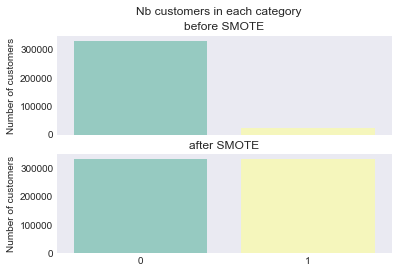

In [44]:
# noinspection PyTypeChecker
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Nb customers in each category')

nb_customers = y.value_counts()
sns.barplot(x=nb_customers.index, y=nb_customers.values, ax=ax1)
ax1.set_title('before SMOTE')
ax1.set_ylabel('Number of customers')

nb_customers_sm = y_sm.value_counts()
sns.barplot(x=nb_customers_sm.index, y=nb_customers_sm.values, ax=ax2)
ax2.set_title('after SMOTE')
ax2.set_ylabel('Number of customers')

plt.show()

In [47]:
accuracy_results = dict()
recall_results = dict()
f1_score_results = dict()
f2_score_results = dict()
roc_auc_results = dict()


def save_model(model, nb_columns):
    fast_forward_save(model, model.__str__().split('(')[0] + '_' + str(nb_columns))


def retrieve_model(name, nb_columns):
    return fast_forward_retrieve(name + '_' + str(nb_columns))


def model_exists(model, nb_columns):
    return file_exists(model.__str__().split('(')[0] + '_' + str(nb_columns))


def train_and_predict(use_smote, model):
    id_model = model.__str__().split('(')[0] + ' with SMOTE' if use_smote else ' without SMOTE'

    with timer(id_model):
        my_X, my_y = (X_sm, y_sm) if use_smote else (X, y)
        my_X = my_X.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x)).drop(columns=['SK_ID_CURR'],
                                                                                   errors='ignore')
        X_train, X_test, y_train, y_test = train_test_split(my_X, my_y, test_size=0.2, random_state=0)

        if model_exists(model, X_train.shape[1]):
            model = retrieve_model(model.__str__().split('(')[0], X_train.shape[1])
        else:
            print('TRAINING', id_model)
            model.fit(X_train, y_train)
            save_model(model, X_train.shape[1])
        predictions = model.predict(X_test)
        accuracy_results[id_model] = accuracy_score(y_test, predictions)
        recall_results[id_model] = recall_score(y_test, predictions)
        f1_score_results[id_model] = fbeta_score(y_test, predictions, beta=2)
        f2_score_results[id_model] = fbeta_score(y_test, predictions, beta=1)
        roc_auc_results[id_model] = roc_auc_score(y_test, predictions)

        print(f'Accuracy = {accuracy_results[id_model]:.3f}'
              f'\nRecall = {recall_results[id_model]:.3f}'
              f'\nF1 = {f1_score_results[id_model]:.3f}'
              f'\nF2 = {accuracy_results[id_model]:.3f}'
              f'\nROC AUC = {roc_auc_results[id_model]:.3f}')

        cm = confusion_matrix(y_test, predictions)
        plt.figure(figsize=(8, 6))
        plt.title('Confusion Matrix ' + id_model)
        sns.heatmap(cm, annot=True, cmap='Blues')
        plt.show()

    try:
        print(id_model, my_X.columns[np.argsort(model.feature_importances_)[::-1][:20]])
    except AttributeError:
        pass

    return model

LogisticRegression_823 found
RETRIEVING LogisticRegression_823
Accuracy = 0.466
Recall = 0.546
F1 = 0.530
F2 = 0.466
ROC AUC = 0.465


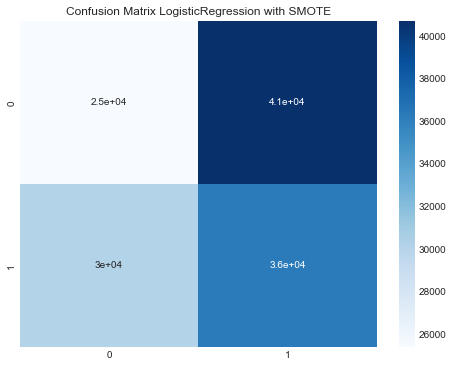

LogisticRegression with SMOTE - done in 9s



In [99]:
lr = LogisticRegression(random_state=0)
lr = train_and_predict(use_smote=True, model=lr)

DecisionTreeClassifier_823 found
RETRIEVING DecisionTreeClassifier_823
Accuracy = 0.493
Recall = 0.493
F1 = 0.493
F2 = 0.493
ROC AUC = 0.493


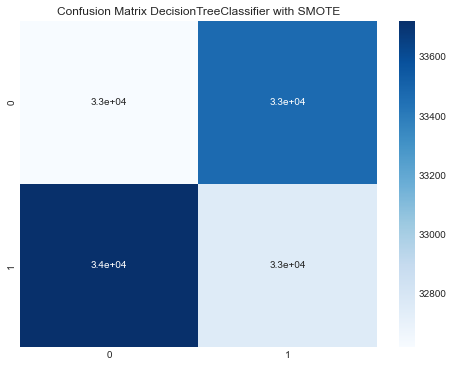

DecisionTreeClassifier with SMOTE - done in 9s

DecisionTreeClassifier with SMOTE Index(['EXT_SOURCE_2', 'PAYMENT_RATE', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'ANNUITY_INCOME_PERC', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_LAST_PHONE_CHANGE',
       'INCOME_PER_PERSON', 'INCOME_CREDIT_PERC', 'INSTAL_DBD_MEAN',
       'INSTAL_DBD_MAX', 'EXT_SOURCE_3', 'INSTAL_AMT_PAYMENT_MIN',
       'INSTAL_DBD_SUM', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
       'DAYS_EMPLOYED_PERC', 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN'],
      dtype='object')


In [100]:
dt = DecisionTreeClassifier(random_state=0)
dt = train_and_predict(use_smote=True, model=dt)

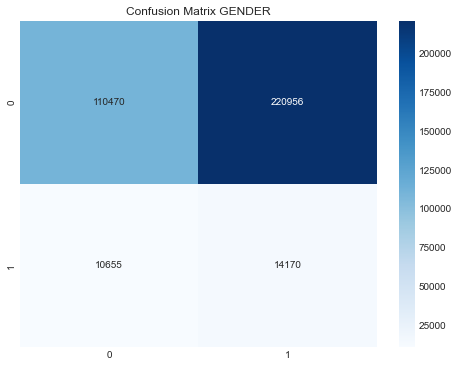

In [101]:
cm_gender = confusion_matrix(df_w_target['TARGET'].astype(int), df_w_target['CODE_GENDER'])
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix GENDER')
sns.heatmap(cm_gender, annot=True, fmt="d", cmap='Blues')
plt.show()

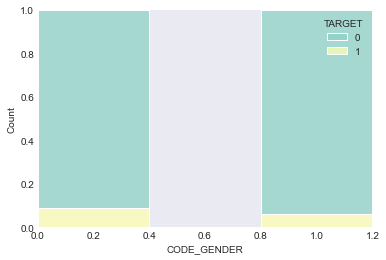

In [102]:
sns.histplot(data=df_w_target, x="CODE_GENDER", hue="TARGET",
             multiple="fill", bins=2, binwidth=.4)
plt.show()

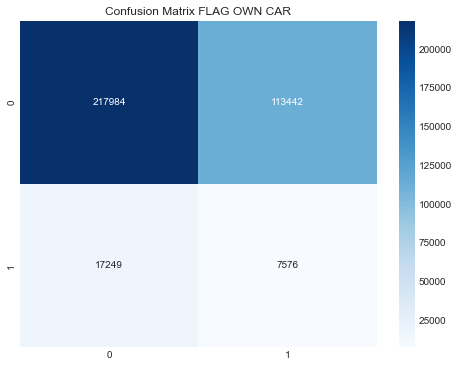

In [108]:
cm_own_car = confusion_matrix(df_w_target['TARGET'].astype(int), df_w_target['FLAG_OWN_CAR'].astype(int))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix FLAG OWN CAR')
sns.heatmap(cm_own_car, annot=True, fmt="d", cmap='Blues')
plt.show()

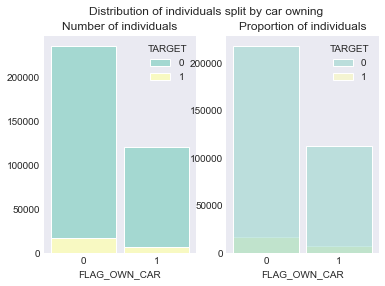

In [111]:
df_w_target.loc[:, 'FLAG_OWN_CAR'] = df_w_target.loc[:, 'FLAG_OWN_CAR'].astype(int).astype(str)

f, (ax1, ax2) = plt.subplots(1, 2)
f.suptitle('Distribution of individuals split by car owning')
sns.histplot(data=df_w_target, x="FLAG_OWN_CAR", hue="TARGET",
             discrete=True, ax=ax1, multiple='stack', shrink=0.9)
ax1.set_title('Number of individuals')
ax2.set_title('Proportion of individuals')
ax1.set_ylabel('')
sns.histplot(data=df_w_target, x="FLAG_OWN_CAR", hue="TARGET",
             discrete=True, multiple='layer', shrink=0.9, ax=ax2)
ax2.set_title('Proportion of individuals')
ax2.set_ylabel('')
plt.show()

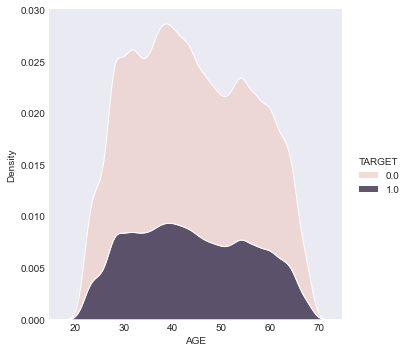

In [116]:
age = (-X_sm['DAYS_BIRTH'] / 365.25).rename('AGE')
sns.displot(x=age, kind="kde", hue=y_sm, fill=True, multiple='stack')
plt.show()

In [117]:
X_sm['CNT_FAM_MEMBERS'] = X_sm['CNT_FAM_MEMBERS'].astype(int)
X_sm['DAYS_BIRTH'] = X_sm['DAYS_BIRTH'].astype(float)

<Figure size 864x648 with 0 Axes>

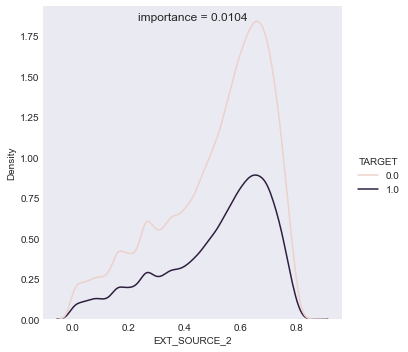

<Figure size 864x648 with 0 Axes>

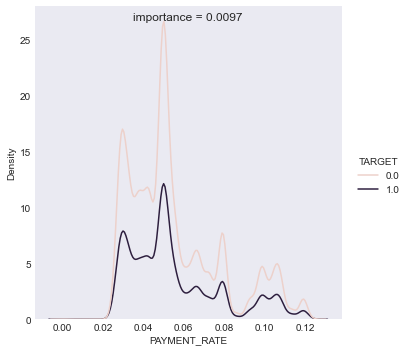

In [118]:
nb_most_important_columns = 20
index_most_important_columns = np.argsort(dt.feature_importances_)[::-1][:nb_most_important_columns]
most_important_columns = X_sm.columns[index_most_important_columns]
feature_importance = dt.feature_importances_[index_most_important_columns]

for col, importance in zip(most_important_columns[:2], feature_importance[:2]):

    f = plt.figure(figsize=(12, 9))
    if X_sm[col].dtype == float:
        sns.displot(x=X_sm[col], kind='kde', hue=y_sm, multiple="layer")
    else:
        sns.displot(x=X_sm[col], kind='hist', shrink=0.8, hue=y_sm, fill=True, multiple="dodge", stat='probability',
                    discrete=True)
    plt.title(f'importance = {importance:.4f}', y=1.0, pad=-14)
    plt.show()

RandomForestClassifier_823 not found
TRAINING RandomForestClassifier with SMOTE
SAVING RandomForestClassifier_823
Accuracy = 0.962
Recall = 0.924
F1 = 0.938
F2 = 0.962
ROC AUC = 0.962


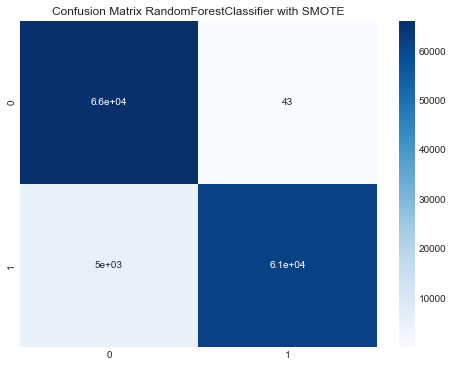

RandomForestClassifier with SMOTE - done in 861s

RandomForestClassifier with SMOTE Index(['YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'EMERGENCYSTATE_MODE_No', 'CODE_GENDER',
       'NAME_EDUCATION_TYPE_Highereducation', 'EXT_SOURCE_2', 'FLAG_OWN_CAR',
       'HOUSETYPE_MODE_blockofflats', 'EXT_SOURCE_3', 'DAYS_EMPLOYED',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'WALLSMATERIAL_MODE_Panel',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI',
       'REFUSED_APP_CREDIT_PERC_MAX', 'DAYS_EMPLOYED_PERC', 'OWN_CAR_AGE',
       'FLAG_PHONE'],
      dtype='object')


In [119]:
rf = RandomForestClassifier(random_state=0)
rf = train_and_predict(use_smote=True, model=rf)

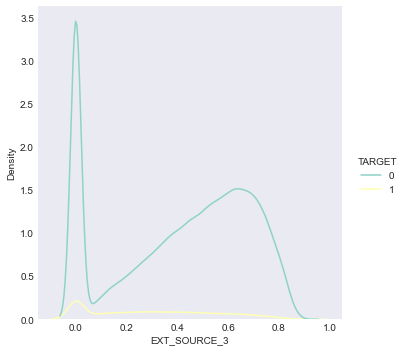

In [120]:
sns.displot(x=X['EXT_SOURCE_3'], kind='kde', hue=y, multiple="layer")
plt.show()

LGBMClassifier_823 not found
TRAINING LGBMClassifier with SMOTE
SAVING LGBMClassifier_823
Accuracy = 0.962
Recall = 0.926
F1 = 0.939
F2 = 0.962
ROC AUC = 0.962


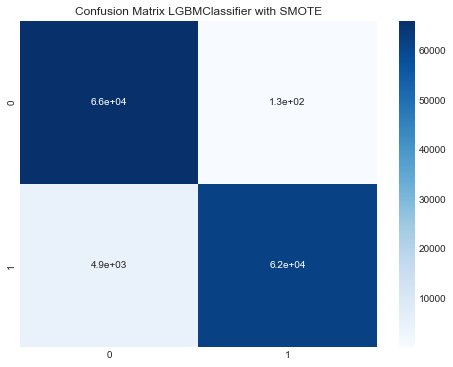

LGBMClassifier with SMOTE - done in 41s

LGBMClassifier with SMOTE Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'EXT_SOURCE_1', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'BURO_MONTHS_BALANCE_SIZE_MEAN', 'APPROVED_HOUR_APPR_PROCESS_START_MAX',
       'NAME_FAMILY_STATUS_Married', 'PAYMENT_RATE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'POS_SK_DPD_DEF_MAX',
       'APPROVED_CNT_PAYMENT_MEAN', 'OWN_CAR_AGE', 'DAYS_BIRTH',
       'INSTAL_DPD_MAX', 'NAME_FAMILY_STATUS_Singlenotmarried',
       'NAME_FAMILY_STATUS_Civilmarriage',
       'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'NAME_FAMILY_STATUS_Separated',
       'FLAG_OWN_CAR'],
      dtype='object')


In [121]:
lgbm = LGBMClassifier()
lgbm = train_and_predict(use_smote=True, model=lgbm)

In [122]:
def load_model_and_predict(model_name, prediction_input):
    t0 = time.time()
    model = retrieve_model(model_name, prediction_input.shape[1])
    prediction = model.predict(prediction_input)
    print("{} - done in {:.2f}s".format('loading model and predicting with ' + model_name, time.time() - t0))
    return prediction


to_predict = X_sm.iloc[0:1, :]

In [123]:
rf

RandomForestClassifier(random_state=0)

In [124]:
roc_auc_results

{'LogisticRegression with SMOTE': 0.46531752926520475,
 'DecisionTreeClassifier with SMOTE': 0.4931406448430914,
 'RandomForestClassifier with SMOTE': 0.961865763734487,
 'LGBMClassifier with SMOTE': 0.961809240007231}

In [125]:
f1_score_results

{'LogisticRegression with SMOTE': 0.5296246293094148,
 'DecisionTreeClassifier with SMOTE': 0.49312354733432096,
 'RandomForestClassifier with SMOTE': 0.9384535033948156,
 'LGBMClassifier with SMOTE': 0.9392056902130779}

In [128]:
X_sm.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR',
       'CC_NAME_CONTRACT_STATUS_Signed_MISSING',
       'CC_NAME_CONTRACT_STATUS_nan_MIN', 'CC_NAME_CONTRACT_STATUS_nan_MAX',
       'CC_NAME_CONTRACT_STATUS_nan_MEAN', 'CC_NAME_CONTRACT_STATUS_nan_SUM',
       'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_NAME_CONTRACT_STATUS_nan_MISSING', 'CC_COUNT'],
      dtype='object', length=823)

In [299]:
X_sm.columns[np.argsort(lgbm.feature_importances_)[::-1][:20]]


Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'EXT_SOURCE_1', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'BURO_MONTHS_BALANCE_SIZE_MEAN', 'APPROVED_HOUR_APPR_PROCESS_START_MAX',
       'NAME_FAMILY_STATUS_Married', 'PAYMENT_RATE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'POS_SK_DPD_DEF_MAX',
       'APPROVED_CNT_PAYMENT_MEAN', 'OWN_CAR_AGE', 'DAYS_BIRTH',
       'INSTAL_DPD_MAX', 'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Civil marriage',
       'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'NAME_FAMILY_STATUS_Separated',
       'FLAG_OWN_CAR'],
      dtype='object')

In [160]:
idx = np.argsort(lgbm.feature_importances_)[::-1][:350]

In [161]:
lgbm.feature_importances_[idx]

array([148, 136,  79,  75,  59,  53,  53,  48,  46,  42,  42,  41,  40,
        40,  39,  38,  37,  35,  34,  34,  33,  30,  30,  29,  28,  28,
        27,  26,  25,  24,  24,  23,  23,  20,  20,  20,  19,  18,  18,
        18,  17,  17,  17,  16,  16,  16,  16,  15,  15,  15,  15,  14,
        14,  14,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,
        12,  12,  12,  12,  12,  12,  11,  11,  11,  11,  11,  11,  11,
        11,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,
        10,   9,   9,   9,   9,   9,   9,   9,   8,   8,   8,   8,   8,
         8,   8,   8,   8,   8,   8,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   6,   6,   6,   6,   6,
         6,   6,   6,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   

In [163]:
X_sm[X_sm.columns[idx]]


,EXT_SOURCE_3,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_QRT,BURO_MONTHS_BALANCE_SIZE_MEAN,APPROVED_HOUR_APPR_PROCESS_START_MAX,NAME_FAMILY_STATUS_Married,PAYMENT_RATE,DEF_30_CNT_SOCIAL_CIRCLE,...,ENTRANCES_MODE,BURO_CREDIT_TYPE_Real estate loan_MEAN,OCCUPATION_TYPE_Secretaries,BURO_CREDIT_CURRENCY_currency 3_MEAN,BURO_CREDIT_CURRENCY_currency 4_MEAN,BURO_CREDIT_CURRENCY_nan_MEAN,BURO_CREDIT_TYPE_Another type of loan_MEAN,BURO_CREDIT_TYPE_Car loan_MEAN,BURO_CREDIT_TYPE_Cash loan (non-earmarked)_MEAN,OCCUPATION_TYPE_Sales staff
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.139376,0.262949,2.000000,0.083037,0.000000,13.750000,9.000000,0,0.060749,2.000000,...,0.069000,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0
100003,0.000000,0.622246,1.000000,0.311267,0.000000,0.000000,17.000000,1,0.027598,0.000000,...,0.034500,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0
100004,0.729567,0.555912,0.000000,0.000000,0.000000,0.000000,5.000000,0,0.050000,0.000000,...,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0
100006,0.000000,0.650442,2.000000,0.000000,0.000000,0.000000,15.000000,0,0.094941,0.000000,...,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0
100007,0.000000,0.322738,0.000000,0.000000,0.000000,0.000000,15.000000,0,0.042623,0.000000,...,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306596,0.051159,0.266354,0.000000,0.032173,0.000000,9.670351,14.677943,0,0.039017,0.000000,...,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.053676,0.0,0
9306597,0.653890,0.106941,2.684633,0.000000,0.000000,2.533451,19.369265,1,0.051072,0.894878,...,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.010512,0.0,0
9306598,0.167487,0.294804,0.000000,0.000000,0.306684,5.826992,14.226735,1,0.064476,0.000000,...,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [289]:
lgbm_models = dict()

mini = math.log(5)
maxi = math.log(500)
nb_attempts = 30

plot_f1_x = []
plot_f1_y = []
plot_roc_y = []

for nb_cols in [int(round(math.exp(u), 0)) for u in np.arange(mini, maxi, step=(maxi-mini)/nb_attempts)]:
#for nb_cols in [10, 20, 25, 30, 35, 40, 45, 50, 65, 80, 100, 150, 225, 300, 350]:
    this_model = LGBMClassifier(random_state=0)

    id_model = this_model.__str__().split('(')[0] + '_' + str(nb_cols)
    idx_columns_selected = np.argsort(lgbm.feature_importances_)[::-1][:nb_cols]
    my_X, my_y = (X_sm[X_sm.columns[idx_columns_selected]], y_sm)
    my_X = my_X.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x)).drop(columns=['SK_ID_CURR'], errors='ignore')
    X_train, X_test, y_train, y_test = train_test_split(my_X, my_y, test_size=0.2, random_state=0)

    with timer('TRAINING ' + id_model):
        this_model.fit(X_train, y_train)
    lgbm_models[nb_cols] = this_model

    predictions = this_model.predict(X_test)
    accuracy_results[id_model] = accuracy_score(y_test, predictions)
    recall_results[id_model] = recall_score(y_test, predictions)
    f1_score_results[id_model] = fbeta_score(y_test, predictions, beta=2)
    f2_score_results[id_model] = fbeta_score(y_test, predictions, beta=1)
    roc_auc_results[id_model] = roc_auc_score(y_test, predictions)

    plot_f1_y.append(f1_score_results[id_model])
    plot_roc_y.append(roc_auc_results[id_model])
    plot_f1_x.append(nb_cols)

    print(f'Accuracy = {accuracy_results[id_model]:.3f}'
          f'\nRecall = {recall_results[id_model]:.3f}'
          f'\nF1 = {f1_score_results[id_model]:.3f}'
          f'\nF2 = {accuracy_results[id_model]:.3f}'
          f'\nROC AUC = {roc_auc_results[id_model]:.3f}\n')

TRAINING LGBMClassifier_5 - done in 1s

Accuracy = 0.889
Recall = 0.830
F1 = 0.850
F2 = 0.889
ROC AUC = 0.890

TRAINING LGBMClassifier_6 - done in 1s

Accuracy = 0.896
Recall = 0.838
F1 = 0.858
F2 = 0.896
ROC AUC = 0.896

TRAINING LGBMClassifier_7 - done in 1s

Accuracy = 0.951
Recall = 0.907
F1 = 0.923
F2 = 0.951
ROC AUC = 0.951

TRAINING LGBMClassifier_8 - done in 1s

Accuracy = 0.951
Recall = 0.907
F1 = 0.923
F2 = 0.951
ROC AUC = 0.951

TRAINING LGBMClassifier_9 - done in 1s

Accuracy = 0.951
Recall = 0.909
F1 = 0.925
F2 = 0.951
ROC AUC = 0.951

TRAINING LGBMClassifier_11 - done in 1s

Accuracy = 0.953
Recall = 0.912
F1 = 0.927
F2 = 0.953
ROC AUC = 0.953

TRAINING LGBMClassifier_13 - done in 2s

Accuracy = 0.955
Recall = 0.915
F1 = 0.930
F2 = 0.955
ROC AUC = 0.955

TRAINING LGBMClassifier_15 - done in 2s

Accuracy = 0.956
Recall = 0.916
F1 = 0.931
F2 = 0.956
ROC AUC = 0.956

TRAINING LGBMClassifier_17 - done in 2s

Accuracy = 0.956
Recall = 0.918
F1 = 0.932
F2 = 0.956
ROC AUC = 0.95

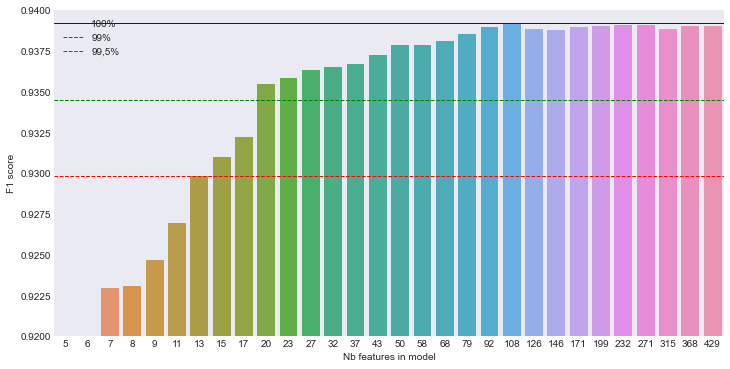

In [292]:
plt.figure(figsize=(12,6))
previous_f1 = f1_score_results['LGBMClassifier with SMOTE']
sns.barplot(x=plot_f1_x, y=plot_f1_y)
plt.axhline(y=previous_f1, color="blue", lw=1, label="100%")
plt.axhline(y=previous_f1*.99, color="red", ls="--", lw=1, label='99%')
plt.axhline(y=previous_f1*.995, color="green", ls="--", lw=1, label = "99,5%")
plt.ylim([0.92, 0.94])
plt.xlabel('Nb features in model')
plt.ylabel('F1 score')
plt.legend(loc='upper left')

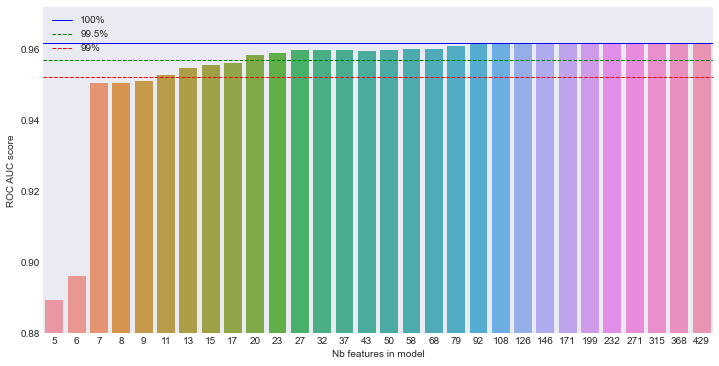

In [293]:
plt.figure(figsize=(12,6))
previous_rocauc = roc_auc_results['LGBMClassifier with SMOTE']
sns.barplot(x=plot_f1_x, y=plot_roc_y)
plt.ylim([0.88, .972])
plt.axhline(y=previous_rocauc, color="blue", lw=1, label='100%')
plt.axhline(y=previous_rocauc*.995, color="green", ls="--", lw=1, label='99.5%')
plt.axhline(y=previous_rocauc*.99, color="red", ls="--", lw=1, label='99%')
plt.xlabel('Nb features in model')
plt.ylabel('ROC AUC score')
plt.legend(loc='upper left')

In [300]:
nb_cols_selected = 20
idx_columns_selected = np.argsort(lgbm.feature_importances_)[::-1][:nb_cols_selected]
X_sm_20 = X_sm[X_sm.columns[idx_columns_selected]]

In [301]:
X_sm_20

,EXT_SOURCE_3,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_1,AMT_REQ_CREDIT_BUREAU_QRT,BURO_MONTHS_BALANCE_SIZE_MEAN,APPROVED_HOUR_APPR_PROCESS_START_MAX,NAME_FAMILY_STATUS_Married,PAYMENT_RATE,DEF_30_CNT_SOCIAL_CIRCLE,POS_SK_DPD_DEF_MAX,APPROVED_CNT_PAYMENT_MEAN,OWN_CAR_AGE,DAYS_BIRTH,INSTAL_DPD_MAX,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Civil marriage,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,NAME_FAMILY_STATUS_Separated,FLAG_OWN_CAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,
100002,0.139376,0.262949,2.000000,0.083037,0.000000,13.750000,9.000000,0,0.060749,2.000000,0.000000,24.000000,0.000000,-9461.0,0.000000,1,0,2.000000,0,0
100003,0.000000,0.622246,1.000000,0.311267,0.000000,0.000000,17.000000,1,0.027598,0.000000,0.000000,10.000000,0.000000,-16765.0,0.000000,0,0,2.000000,0,0
100004,0.729567,0.555912,0.000000,0.000000,0.000000,0.000000,5.000000,0,0.050000,0.000000,0.000000,4.000000,26.000000,-19046.0,0.000000,1,0,2.000000,0,1
100006,0.000000,0.650442,2.000000,0.000000,0.000000,0.000000,15.000000,0,0.094941,0.000000,0.000000,18.000000,0.000000,-19005.0,0.000000,0,1,2.000000,0,0
100007,0.000000,0.322738,0.000000,0.000000,0.000000,0.000000,15.000000,0,0.042623,0.000000,0.000000,20.666667,0.000000,-19932.0,12.000000,1,0,2.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306596,0.051159,0.266354,0.000000,0.032173,0.000000,9.670351,14.677943,0,0.039017,0.000000,0.000000,7.734551,0.536761,-17233.0,1.000000,0,0,2.000000,0,0
9306597,0.653890,0.106941,2.684633,0.000000,0.000000,2.533451,19.369265,1,0.051072,0.894878,0.000000,6.894878,0.735857,-13794.0,0.000000,0,0,1.894878,0,0
9306598,0.167487,0.294804,0.000000,0.000000,0.306684,5.826992,14.226735,1,0.064476,0.000000,0.306684,21.177458,28.425965,-15944.0,16.120565,0,0,3.000000,0,0


In [309]:
lgbm20 = LGBMClassifier()
cross_validation = StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
lgbm_parameters = {
    'max_depth': [4, 6, 8, 9, 10],
    'n_estimators': [100, 150, 200, 500, 700, 1000],
    'num_leaves': [10, 20, 50, 75, 100],
    'learning_rate': [0.005, 0.01]
}

with timer('LGBM hyperparameters optimization'):
    lgbm_grid = GridSearchCV(lgbm20, lgbm_parameters, verbose =1, scoring='roc_auc', cv=cross_validation)
    lgbm_grid.fit(X_sm_20, y_sm)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
LGBM hyperparameters optimization - done in 19202s



In [310]:
lgbm_grid.best_score_

0.9812574634740818

In [312]:
lgbm_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1000,
 'num_leaves': 100}

In [320]:
save_model(lgbm_grid.best_estimator_, 'optimized_20cols')

SAVING LGBMClassifier_optimized_20cols


In [321]:
classifier = lgbm_grid.best_estimator_

In [322]:
classifier.feature_name_

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_1',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'BURO_MONTHS_BALANCE_SIZE_MEAN',
 'APPROVED_HOUR_APPR_PROCESS_START_MAX',
 'NAME_FAMILY_STATUS_Married',
 'PAYMENT_RATE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'POS_SK_DPD_DEF_MAX',
 'APPROVED_CNT_PAYMENT_MEAN',
 'OWN_CAR_AGE',
 'DAYS_BIRTH',
 'INSTAL_DPD_MAX',
 'NAME_FAMILY_STATUS_Single_/_not_married',
 'NAME_FAMILY_STATUS_Civil_marriage',
 'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE',
 'NAME_FAMILY_STATUS_Separated',
 'FLAG_OWN_CAR']

In [324]:
classifier.feature_importances_

array([ 7377,  7354,  8082,  6414,  4186,  5247,  8850,  1408, 10421,
        2912,  3418,  5347,  3688,  8020,  4362,  1162,  1180,  7219,
         907,  1446], dtype=int32)

In [326]:
classifier.min_child_samples

20

In [328]:
classifier.min_child_weight

0.001

In [330]:
fbeta_score(y_sm, classifier.predict(X_sm_20), beta=1)

0.9576724627656328

In [332]:
roc_auc_score(y_sm, classifier.predict(X_sm_20))

0.9591960196242902

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X_sm_20, y_sm, test_size=0.2, random_state=0)
lgbm20 = LGBMClassifier(random_state=100, learning_rate= 0.01, max_depth=10, n_estimators=1000, num_leaves=100)
lgbm20.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=1000,
               num_leaves=100, random_state=100)

In [353]:
fbeta_score(y_test, lgbm20.predict(X_test), beta=1)

0.9567225186433275

In [354]:
fbeta_score(y_test, lgbm_models[20].predict(X_test), beta=1)

0.9569991565399394

In [355]:
fbeta_score(y_test, classifier.predict(X_test), beta=1)

0.9576741864020718

In [356]:
X_sm_20.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'EXT_SOURCE_1', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'BURO_MONTHS_BALANCE_SIZE_MEAN', 'APPROVED_HOUR_APPR_PROCESS_START_MAX',
       'NAME_FAMILY_STATUS_Married', 'PAYMENT_RATE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'POS_SK_DPD_DEF_MAX',
       'APPROVED_CNT_PAYMENT_MEAN', 'OWN_CAR_AGE', 'DAYS_BIRTH',
       'INSTAL_DPD_MAX', 'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Civil marriage',
       'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'NAME_FAMILY_STATUS_Separated',
       'FLAG_OWN_CAR'],
      dtype='object')

In [357]:
classifier.feature_name_

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_1',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'BURO_MONTHS_BALANCE_SIZE_MEAN',
 'APPROVED_HOUR_APPR_PROCESS_START_MAX',
 'NAME_FAMILY_STATUS_Married',
 'PAYMENT_RATE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'POS_SK_DPD_DEF_MAX',
 'APPROVED_CNT_PAYMENT_MEAN',
 'OWN_CAR_AGE',
 'DAYS_BIRTH',
 'INSTAL_DPD_MAX',
 'NAME_FAMILY_STATUS_Single_/_not_married',
 'NAME_FAMILY_STATUS_Civil_marriage',
 'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE',
 'NAME_FAMILY_STATUS_Separated',
 'FLAG_OWN_CAR']

In [375]:
len(set(df['SK_ID_CURR'])), df.shape

(356251, (356251, 827))

In [377]:
df_copy = df.set_index('SK_ID_CURR', drop=True)[list(X_sm_20.columns) + ['TARGET']]
fast_forward_save(df_copy, 'df_for_api')
fast_forward_save(classifier, 'model_for_api')